# Regression algorithms

Comparing Decision Tree vs Random Forest vs XGBoost

In [ ]:
# install packages via pip from jupyter notebook
# %pip install pandas
# %pip install numpy
# %pip install sklearn
# %pip install xgboost
# %pip install numpy

In [18]:
# import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [3]:
train_data = pd.read_csv('data/train.csv')

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
train_data.shape

(1460, 81)

In [7]:
train_data['SalePrice'].isnull().sum()

0

In [11]:
y = train_data.SalePrice
x = train_data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])
x.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [19]:
train_x, test_x, train_y, test_y = train_test_split(x.values, y.values, test_size=0.25)
train_x = imputer.fit_transform(train_x)
test_x = imputer.fit_transform(test_x)

In [30]:
# decision tree
decision_model = DecisionTreeRegressor()  
decision_model.fit(train_x, train_y) 
predicted_decision_trees = decision_model.predict(test_x)
# Note MAE = Mean Absolute Error
print ("MAE using Decision Tress :", mean_absolute_error(test_y, predicted_decision_trees))

MAE using Decision Tress : 24814.972602739726


In [31]:
# random forest
forest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
forest_model.fit(train_x, train_y )
predicted_random_forest = forest_model.predict(test_x)
print("MAE using Random Forest:", mean_absolute_error(test_y, predicted_random_forest))

MAE using Random Forest: 15715.947711531951


In [32]:
# xgboost
xg_model = XGBRegressor(n_estimators=100)
xg_model.fit(train_x, train_y)
predicted_XGBoost = xg_model.predict(test_x)
print("MAE using XGBoost: ", mean_absolute_error(test_y, predicted_XGBoost))

MAE using XGBoost:  15264.796500428081


## When to use which (decision tree vs random forest vs xgboost)?
https://www.datasciencecentral.com/decision-tree-vs-random-forest-vs-boosted-trees-explained/

https://medium.com/geekculture/xgboost-versus-random-forest-898e42870f30

### Decision tree
A decision tree is a simple, decision making-diagram.
<div>
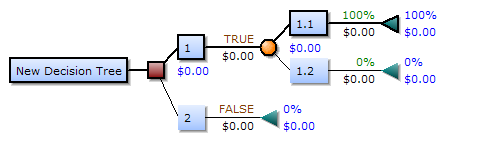
</div>

### Random forest
Random forests are a large number of trees, combined (using averages or “majority rules”) at the end of the process.
<div>
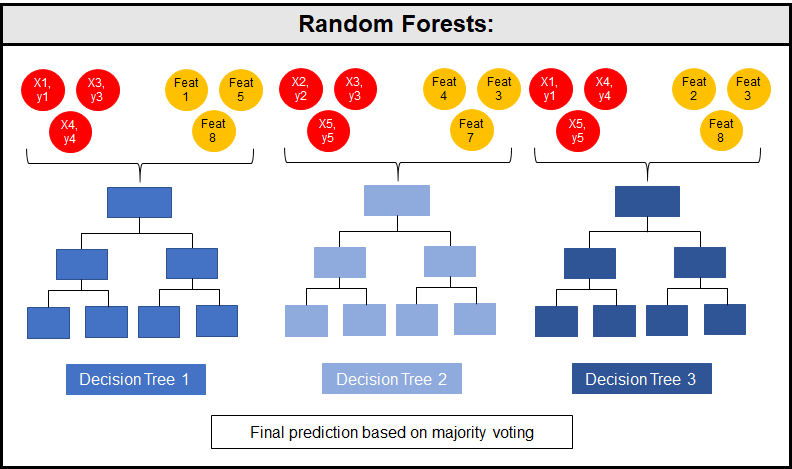
</div>

### XGBoost
Gradient boosting machines also combine decision trees, but uses gradient boosting to combine results along the way.
<div>
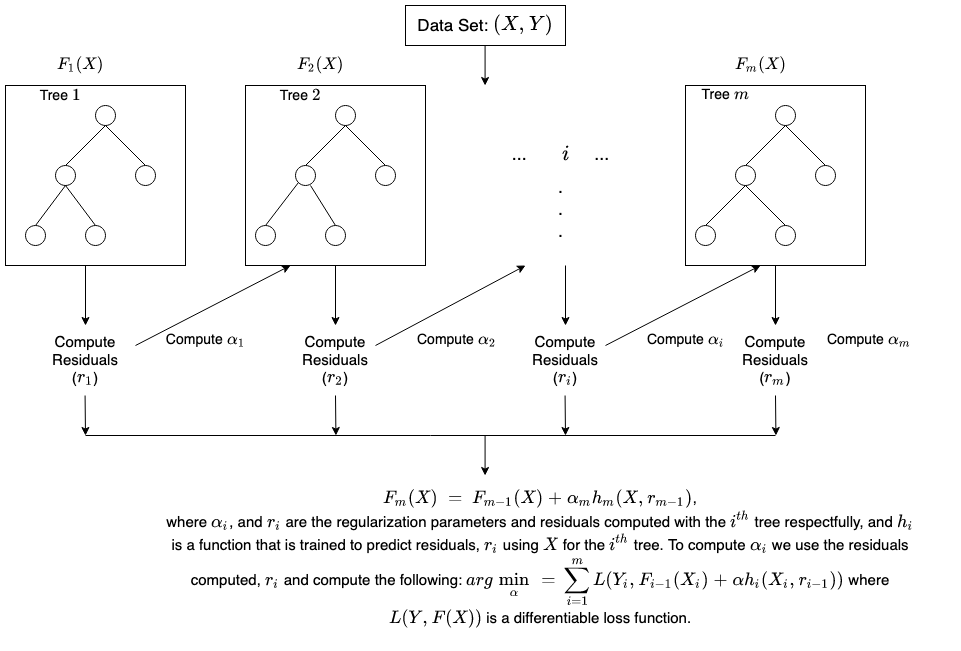
</div>



## Bagging vs Boosting
### The difference between bagging andd boosting
<div>
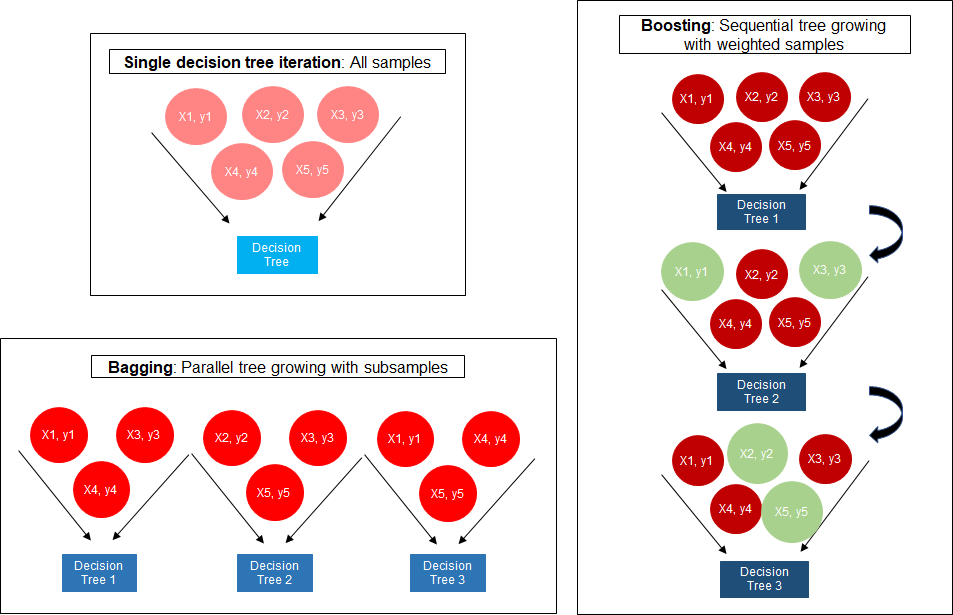
</div>
### How we end up with XGBoost
<div>
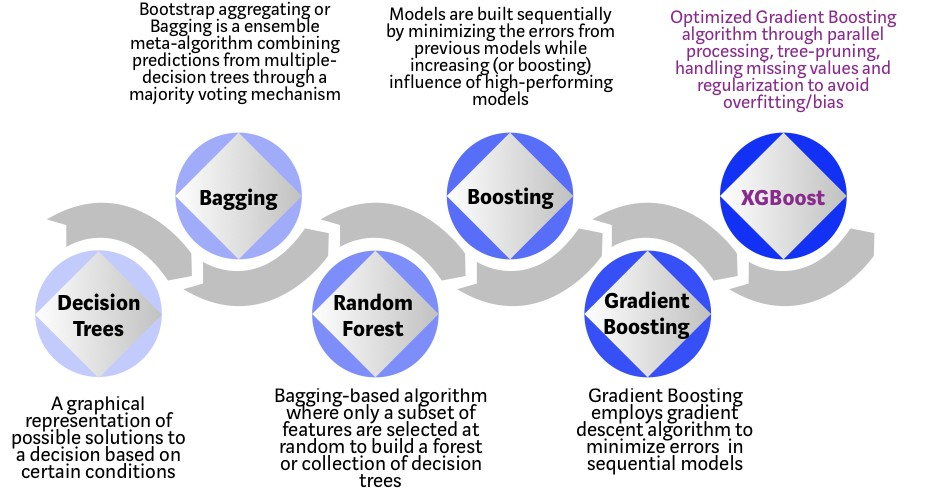
</div>

In [ ]:
# Next work
## https://towardsdatascience.com/7-essential-tips-for-writing-with-jupyter-notebook-60972a1a8901

## Using MAE vs RMSE?
https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d
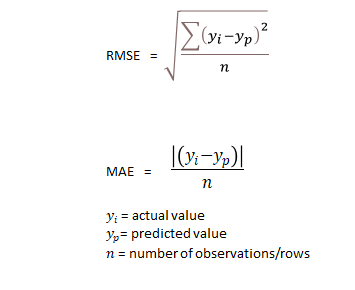

Mean Absolute Error (MAE) and Root mean squared error (RMSE) are two of the most common metrics used to measure accuracy for continuous variables. Used to be that MAE was most popular but now most published research uses RMSE. 

### MAE
Mean Absolute Error (MAE): MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

### RMSE
Root mean squared error (RMSE): RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation.

### Major differences
1. Taking the square root of the average squared errors has some interesting implications for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable. 

2. Focusing on the upper bound, this means that RMSE has a tendency to be increasingly larger than MAE as the test sample size increases. This can problematic when comparing RMSE results calculated on different sized test samples, which is frequently the case in real world modeling.

### Conclusion
RMSE has the benefit of penalizing large errors more so can be more appropriate in some cases, for example, if being off by 10 is more than twice as bad as being off by 5. But if being off by 10 is just twice as bad as being off by 5, then MAE is more appropriate.

From an interpretation standpoint, MAE is clearly the winner. RMSE does not describe average error alone and has other implications that are more difficult to tease out and understand.

On the other hand, one distinct advantage of RMSE over MAE is that RMSE avoids the use of taking the absolute value